In [1]:
import os
import sys

sys.path.append("/home/yuri/github.com/AoesJP/project_pokereader")
sys.path

['/home/yuri/github.com/AoesJP/project_pokereader/notebooks',
 '/home/yuri/github.com/AoesJP/project_pokereader',
 '/home/yuri/.pyenv/versions/3.10.6/lib/python310.zip',
 '/home/yuri/.pyenv/versions/3.10.6/lib/python3.10',
 '/home/yuri/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/home/yuri/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages',
 '/home/yuri/github.com/AoesJP/project_pokereader']

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import pyocr
from PIL import Image, ImageEnhance, ImageOps, ImageFilter

import pokedex.utils_dataset as pku
import pokedex.augmentation as pka
from pokedex.edges import deformer, draw

2024-05-22 22:40:38.522822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 22:40:39.234563: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
PROJECT_PATH = Path(".").absolute().parent
DATA_PATH = PROJECT_PATH / "data"
DATA_PATH

PosixPath('/home/yuri/github.com/AoesJP/project_pokereader/data')

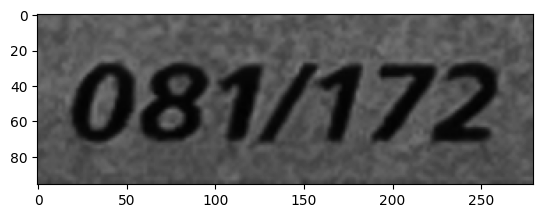

In [21]:
img_dark_text = Image.fromarray(cv2.cvtColor(cv2.imread(str(DATA_PATH / "id_dark_text1.png")), cv2.COLOR_BGR2GRAY))
img_dark_text = img_dark_text.resize((img_dark_text.width * 2, img_dark_text.height * 2))
draw.show_grey(img_dark_text)

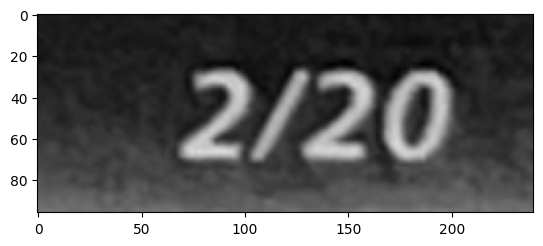

In [40]:
img_light_text = Image.fromarray(cv2.cvtColor(cv2.imread(str(DATA_PATH / "id_light_text1.png")), cv2.COLOR_BGR2GRAY))
img_light_text = img_light_text.resize((img_light_text.width * 2, img_light_text.height * 2))
draw.show_grey(img_light_text)

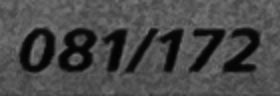

In [99]:
img_dark_text

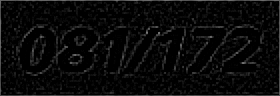

In [100]:
img_dark_text.filter(ImageFilter.FIND_EDGES)

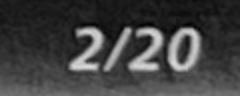

In [98]:
img_light_text

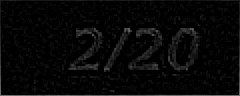

In [103]:
img_light_text.filter(ImageFilter.FIND_EDGES)

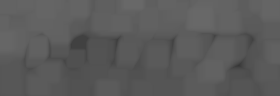

In [163]:
img_dark_text.filter(ImageFilter.GaussianBlur(3)).filter(ImageFilter.MaxFilter(15))

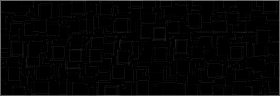

In [143]:
img_dark_text.filter(ImageFilter.MaxFilter(13)).filter(ImageFilter.GaussianBlur(1)).filter(ImageFilter.SHARPEN).filter(
    ImageFilter.FIND_EDGES
)

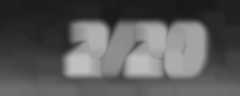

In [164]:
img_light_text.filter(ImageFilter.GaussianBlur(3)).filter(ImageFilter.MaxFilter(13))

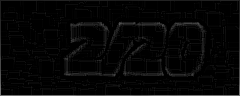

In [144]:
img_light_text.filter(ImageFilter.MaxFilter(13)).filter(ImageFilter.GaussianBlur(1)).filter(ImageFilter.SHARPEN).filter(
    ImageFilter.FIND_EDGES
)

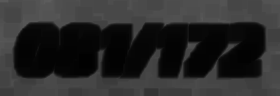

In [96]:
img_dark_text.filter(ImageFilter.MinFilter(13))

In [186]:
def is_groove(img: Image.Image):
    orig_arr = np.array(img, dtype="float32") / 255
    eroded_arr = np.array(img.filter(ImageFilter.GaussianBlur(3)).filter(ImageFilter.MaxFilter(15)), dtype="float32") / 255
    orig_var = orig_arr.var()
    eroded_var = eroded_arr.var()
    return eroded_var - orig_var < 0

In [187]:
is_groove(img_dark_text)

True

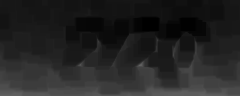

In [188]:
img_light_text.filter(ImageFilter.MinFilter(13))

In [189]:
is_groove(img_light_text)

False

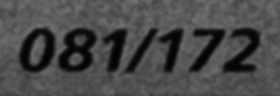

In [190]:
g = img_dark_text.filter(ImageFilter.GaussianBlur(1))
g

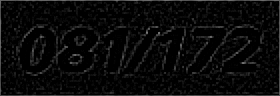

In [92]:
img_dark_edge = img_dark_text.filter(ImageFilter.FIND_EDGES)
img_dark_edge

In [93]:
np.array(img_dark_edge, dtype="int16").mean()

10.187313988095237

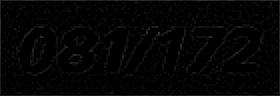

In [94]:
Image.fromarray(np.array(img_dark_edge, dtype="int16") * np.array(img_dark_text.filter(ImageFilter.MaxFilter(13)), dtype="int16"))

In [95]:
np.clip(
    ((np.array(img_dark_edge, dtype="float32") / 255) * (np.array(img_dark_text.filter(ImageFilter.MaxFilter(13)), dtype="float32") / 255))
    * 255,
    0,
    255,
).astype("uint8").mean()

3.946391369047619

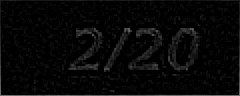

In [54]:
img_light_edge = img_light_text.filter(ImageFilter.FIND_EDGES)
img_light_edge

In [55]:
np.array(img_light_edge).mean()

7.525217013888889

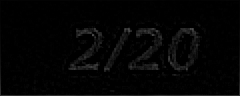

In [91]:
Image.fromarray(np.array(img_light_edge, dtype="int16") * np.array(img_light_text.filter(ImageFilter.MaxFilter(13)), dtype="int16"))